In [2]:
from data_exploration import *

0/876
100/876
200/876
300/876
400/876
500/876
600/876
700/876
800/876


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Plot distribution of relation types
x, y = zip(*sorted(type_relations.items(), key=lambda x:x[1], reverse=True))
#plt.xticks(labels)
#plt.xlabel(labels, rotation="vertical")
labels = [name if i % 1 ==0 else '' for (i, name) in enumerate(x)]

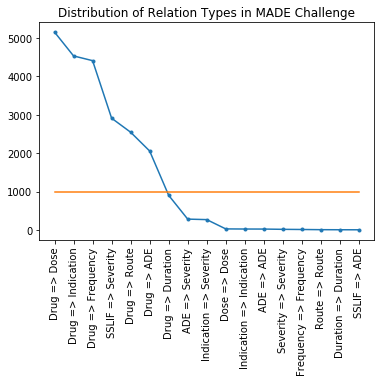

In [22]:
fig, ax = plt.subplots()
#ax.plot()
ax.plot(range(len(x)), y, marker='.')
#ax.set_xticklabels(x, rotation="vertical")
plt.xticks(range(len(x)), labels, rotation="vertical") 
plt.plot(range(len(x)), [1000]*len(x))
_= plt.title("Distribution of Relation Types in MADE Challenge")



In [45]:
def print_relation_examples(entity_type1, entity_type2, thresh=25):
    examples = {}
    count = 0
    for filename, doc in docs.items():
        if count >= thresh:
            break
        for relation in doc.relations:
            if relation.entity_types == (entity_type1, entity_type2):
                examples[doc] = relation
                count += 1
                if count == thresh:

                    break
                continue
                
    
    strings = []   
    for doc, relation in list(examples.items())[:25]:
        first_span = relation.annotation_1.span
        second_span = relation.annotation_2.span
        sorted_entities = sorted((relation.annotation_1, relation.annotation_2), key=lambda x:x.span[0])
        entity1, entity2 = sorted_entities
        start, end = relation.span
        string = ''
        string += doc.text[start -20 : start]
        string += '<{}>  '.format(entity_type1.upper() + '-' + entity_type2.upper())
        string += '<{}>  '.format(entity1.type)
        string += entity1.text
        string += '  </{}>'.format(entity1.type)
        string += doc.text[entity1.span[1]:entity2.span[0]]
        string += '<{}>  '.format(entity2.type)
        string += entity2.text
        string += '  </{}>'.format(entity2.type)
        string += '  </{}>\n\n'.format(entity_type1.upper() + '-' + entity_type2.upper())
        string += doc.text[end: end+20]
        print(string)
        strings.append(string)
    return strings
    
    
    
examples = print_relation_examples('Drug', 'Indication')

protocol with daily <DRUG-INDICATION>  <Drug>  uric acid  </Drug> and IV hydration as prophylaxis against <Indication>  tumor \nlysis syndrome  </Indication>  </DRUG-INDICATION>

 in addition to dail
imately 10 mL of 2% <DRUG-INDICATION>  <Drug>  lidocaine  </Drug> was then injected to  
achieve local <Indication>  anesthesia  </Indication>  </DRUG-INDICATION>

.  A boring needle w
ection and he is on <DRUG-INDICATION>  <Indication>  prophylactic  </Indication> <Drug>  antibiotics  </Drug>  </DRUG-INDICATION>

.  
3.  Mast cell no
ection and he is on <DRUG-INDICATION>  <Indication>  prophylactic  </Indication> Cipro, <Drug>  acyclovir  </Drug>  </DRUG-INDICATION>

 and Noxafil. He wil


876

In [44]:
len(examples)

4

In [16]:
## Find some specific examples of the most common relation, ('Drug', 'Dose')
drug_doses = {}

for filename, doc in docs.items():
    if len(drug_doses) >= 25:
        break
    for relation in doc.relations:
        if relation.entity_types == ('Drug', 'Dose'):
            drug_doses[doc] = relation
            continue
            
    
        
    

NameError: name 'examples' is not defined

In [11]:
for doc, relation in list(drug_doses.items())[:25]:
    start, end = relation.span
    print(doc.text[start - 10: end + 10])

es daily, ciprofloxacin 500 mg daily in 
oximately 10 mL of 2% lidocaine was then 
r nausea, ambien 5mg po qhs pr
r off his steroids by 10 mg every 2 weeks, he continues on 20mg every oth
a day and valacyclovir 500 mg p.o. t.i.
ed p.o.  
vancomycin 125 mg 4 times d
is taking Rapamune 5.5 mg every Mon
ntinue on omeprazole 20 mg p.o. dail
r day and Rapamune 0.5 mg twice a w
h will be high-dose methotrexate and cytarabine in the ea
esthesia: Lidocaine 1%;  mL subc
g off his steroids.  He is going to be taking 20 mg every other day alternating with 10 mg every oth
00 units, Noxafil 200 mg, magnesiu
1 dose of Rituxan at 500 mg/m2 today.  

 received 2 doses of rituximab along wit
 PO Qday, Oxycodone-Acetaminophen 5-325 mg PO Q 4-6 
cations  
levothyroxine (Synthroid) 150 mcg Tablet, Ordered By: [** Name **]  [** Name **]  
Directions: 1 tablet oral DAIL
s to take gabapentin 200 mg twice a d
e current dapsone tablets,  he will
s daily  
dexamethasone 4 mg Tablet, Ordered By: [** Name **] [**